#K Means Clustering

##Data Preprocessing

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
dataset = pd.read_csv('Mall_Customers.csv')
# X = dataset.iloc[:, 3:].values
X = dataset.iloc[:, [3,4]].values
# X = dataset.iloc[:, :].values # running with all parameters / dependent variables


##Using Elbow method to find optimal number of responses
Using kmeans++ to avoid random Initialization trap
we see in the graph that the WCSS changes less rapidly at number of clusters = 5

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

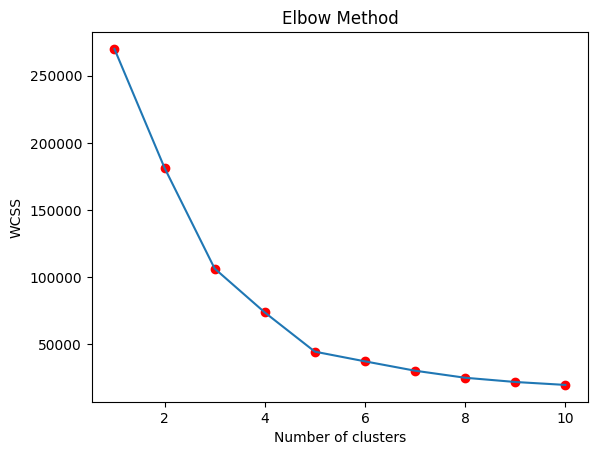

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.scatter(range(1, 11), wcss, color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##Training kMeans Model on data set with 5
clusters

In [36]:
nOfSamples, nOfDepVariables=X.shape
print(nOfDepVariables)
kmeans = KMeans(n_clusters= 5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

2
[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##Visualizing clusters if number of dependent variables ins 2

plotting the graph for visualisation


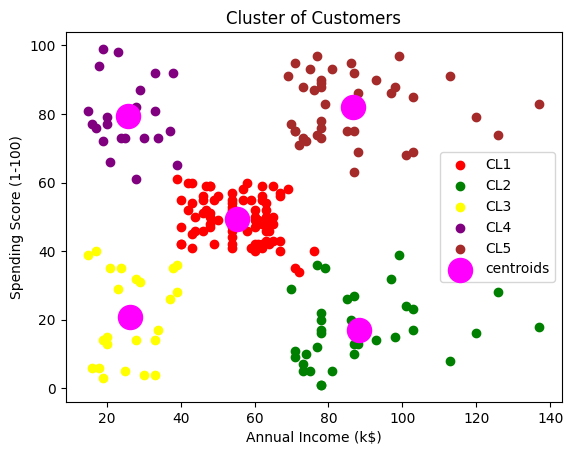

In [37]:
if (nOfDepVariables != 2):
  print('unable to plot graph as the number of dependent variables is not 2')
  exit

print("plotting the graph for visualisation")
cluster_colors=['red', 'green', 'yellow', 'purple', 'brown']
cluster_names = ['CL1', 'CL2', 'CL3', 'CL4', 'CL5']

# plt.scatter(X[:, 0:1], X[:,1:])
for i in range(0,5):
  plt.scatter(X[y_kmeans==i, 0], X[y_kmeans==i, 1], color=cluster_colors[i], label=cluster_names[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='magenta', label='centroids')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()